In [127]:
import pandas as pd
df = pd.read_csv('items_query.csv')

,page_id,collection_id,author,title,estimated_price,price_sold
9,4,0,"209. Probably French or Italian, in late 18th...",A pair of fluted pedestals with scrolls | Pair...,"1,000 - 1,500 EUR","3,360 EUR"
47,4,0,247. Elizabeth Gage,Antique roman coin pendant | Pendentif pièce a...,"1,900 - 2,800 EUR","9,600 EUR"
100,4,2,5. Luis Gil,Pair of cultured and diamond necklaces | Paire...,"7,500 - 11,000 EUR","15,600 EUR"
103,4,2,8. Piaget,Lady's gold and diamond bracelet watch | Piage...,"1,400 - 2,400 EUR","3,600 EUR"
104,4,2,9. David Webb,Pair of cultured pearl and diamond pendent ear...,"14,000 - 24,000 EUR","33,600 EUR"
...,...,...,...,...,...,...
297,2,8,8. Rolex,Reference 116505 Daytona | A pink gold automat...,"35,000 - 55,000 USD","42,000 USD"
298,2,8,9. Rolex,Reference 116509 Daytona | A white gold automa...,"25,000 - 40,000 USD","28,800 USD"
299,2,8,10. Rolex,Reference 16520 'Patrizzi Dial Zenith' Daytona...,"25,000 - 50,000 USD","26,400 USD"
300,2,8,12. Rolex,Reference 16018 Datejust | A yellow gold autom...,"20,000 - 40,000 USD","24,000 USD"


In [128]:
df['author'] = df['author'].fillna('-1.-1')
df[['item_id','author']] = df['author'].str.split('.', n=1, expand=True)
df['price_sold'] = df['price_sold'].fillna('-1 -1')
df[['price_sold', 'currency']] = df['price_sold'].str.split(' ', n=1, expand=True)
df[['low_estimate', 'high_estimate']] = df['estimated_price'].str.split('-', n=1, expand=True)
df['high_estimate'] = df['high_estimate'].str.split(' ', expand=True)[1]
df = df.drop(['estimated_price'], axis=1)

df.dropna().head(100)

,page_id,collection_id,author,title,price_sold,item_id,currency,low_estimate,high_estimate
9,4,0,"Probably French or Italian, in late 18th cen...",A pair of fluted pedestals with scrolls | Pair...,"3,360",209,EUR,"1,000","1,500"
47,4,0,Elizabeth Gage,Antique roman coin pendant | Pendentif pièce a...,"9,600",247,EUR,"1,900","2,800"
100,4,2,Luis Gil,Pair of cultured and diamond necklaces | Paire...,"15,600",5,EUR,"7,500","11,000"
103,4,2,Piaget,Lady's gold and diamond bracelet watch | Piage...,"3,600",8,EUR,"1,400","2,400"
104,4,2,David Webb,Pair of cultured pearl and diamond pendent ear...,"33,600",9,EUR,"14,000","24,000"
...,...,...,...,...,...,...,...,...,...
297,2,8,Rolex,Reference 116505 Daytona | A pink gold automat...,"42,000",8,USD,"35,000","55,000"
298,2,8,Rolex,Reference 116509 Daytona | A white gold automa...,"28,800",9,USD,"25,000","40,000"
299,2,8,Rolex,Reference 16520 'Patrizzi Dial Zenith' Daytona...,"26,400",10,USD,"25,000","50,000"
300,2,8,Rolex,Reference 16018 Datejust | A yellow gold autom...,"24,000",12,USD,"20,000","40,000"


In [51]:
df = pd.read_csv('collections_query.csv')
df.head()

,page_id,collection_id,category,title,details,price,link,partition_0
0,2,9,Category: Past Auction,Legends | The Inaugural Wine and Spirit Sale |...,20 May–5 June 2024 | 3:00 PM CEST | Geneva,"Sale total: 573,500 CHF",https://www.sothebys.com/en/buy/auction/2024/l...,2
1,2,2,Category: Past Auction,Magnificent Jewels,7 June 2024 | 10:00 AM EDT | New York,"Sale total: 30,033,900 USD",https://www.sothebys.com/en/buy/auction/2024/m...,2
2,1,9,Category: Past Auction,Sotheby's Sealed: Ten-Year Challenge: Château ...,10–13 June 2024 | 11:00 AM HKT | Hong Kong,NaN,https://www.sothebys.com/chateau-latour-1998-2008,1
3,3,12,Category: Past Auction,Handbags & Accessories,9–23 May 2024 | 2:00 PM CEST | Zurich,"Sale total: 1,815,480 CHF",https://www.sothebys.com/en/buy/auction/2024/h...,3
4,3,10,Category: Past Auction,NBA Auctions: Playoff Contenders,17–23 May 2024 | 10:00 PM EDT | New York,"Sale total: 510,360 USD",https://www.sothebys.com/en/buy/auction/2024/p...,3


In [52]:
df['category'] = df['category'].str.split(':', expand=True)[1].str.strip().str.lower()

In [53]:
info = df['details'].str.split('|')

In [54]:
df['city'] = list(map(lambda n: n[-1], info))

In [55]:
from datetime import date, datetime

months = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

def get_date(_date):
    if len(_date) == 3:
        start_day_end_day = _date[0].split('–')
        start_day = ''
        end_day = ''
        
        if len(start_day_end_day) == 1:
            start_day = int(start_day_end_day[0])
            end_day = int(start_day_end_day[0])
        elif  len(start_day_end_day) == 2:
            start_day = int(start_day_end_day[0])
            end_day = int(start_day_end_day[1])
            
        start_month = months[_date[1]]
        end_month = months[_date[1]]
        year = int(_date[2])
        
        start_date = date(day=start_day, month=start_month, year=year)
        end_date = date(day=end_day, month=end_month, year=year)
        return [start_date, end_date]
    
    elif len(_date) == 4:
        start_day = int(_date[0])
        start_month = months[_date[1].split('–')[0]]
        end_day = int(_date[1].split('–')[1])
        end_month = months[_date[2]]
        year = int(_date[3])
        
        start_date = date(day=start_day, month=start_month, year=year)
        end_date = date(day=end_day, month=end_month, year=year)
        return [start_date, end_date]

def get_time(_time):
    time_format = "%I:%M %p"
    
    if len(_time) == 3:
        time_of_day = _time[0]
        am_pm = _time[1]
        time = datetime.strptime(time_of_day+ ' ' + am_pm, time_format).time()
        time_zone = _time[2]
        return [time, time_zone]
    return [datetime.time, '']

def get_date_time(_date_time):
    if len(_date_time) == 1:
        start_date, end_date = get_date(_date_time[0].strip().split())
        return start_date, end_date, ''
    
    elif len(_date_time) == 2:
        start_date, end_date = get_date(_date_time[0].strip().split())
        _time, time_zone = get_time(_date_time[1].strip().split())
        
        
        return datetime.combine(start_date, _time), datetime.combine(end_date, _time), time_zone
    
    return '', ''

df[['start_date', 'end_date','time_zone']] = list(map(lambda date_time: get_date_time(date_time[:-1]), info))
df = df.drop(['details'], axis=1)

In [56]:
def get_price(_price_str):
    if isinstance(_price_str, str):
        _price = _price_str.split(':')[1]
        _price, _currency = _price.split()
        return int(_price.replace(',', '')), _currency
    return -1, ''

df[['price', 'currency']] = list(map(lambda n: get_price(n), df['price']))
df

,page_id,collection_id,category,title,price,link,partition_0,city,start_date,end_date,time_zone,currency
0,2,9,past auction,Legends | The Inaugural Wine and Spirit Sale |...,573500,https://www.sothebys.com/en/buy/auction/2024/l...,2,Geneva,2024-05-20 15:00:00,2024-06-05 15:00:00,CEST,CHF
1,2,2,past auction,Magnificent Jewels,30033900,https://www.sothebys.com/en/buy/auction/2024/m...,2,New York,2024-06-07 10:00:00,2024-06-07 10:00:00,EDT,USD
2,1,9,past auction,Sotheby's Sealed: Ten-Year Challenge: Château ...,-1,https://www.sothebys.com/chateau-latour-1998-2008,1,Hong Kong,2024-06-10 11:00:00,2024-06-13 11:00:00,HKT,
3,3,12,past auction,Handbags & Accessories,1815480,https://www.sothebys.com/en/buy/auction/2024/h...,3,Zurich,2024-05-09 14:00:00,2024-05-23 14:00:00,CEST,CHF
4,3,10,past auction,NBA Auctions: Playoff Contenders,510360,https://www.sothebys.com/en/buy/auction/2024/p...,3,New York,2024-05-17 22:00:00,2024-05-23 22:00:00,EDT,USD
5,3,1,past auction,RM Sotheby's | Dare to Dream Collection,-1,https://www.sothebys.com/dd24,3,Toronto,2024-05-31 10:00:00,2024-06-01 10:00:00,EDT,
6,2,7,past auction,No Detail is Small: Art & Design from The Tamo...,7199040,https://www.sothebys.com/en/buy/auction/2024/n...,2,New York,2024-06-05 17:00:00,2024-06-05 17:00:00,EDT,USD
7,4,3,past auction,Sotheby's Sealed: Colnago V4Rs “Gioiello”,-1,https://www.sothebys.com/colnago-v4rs-gioiello,4,Milan,2024-05-10 11:00:00,2024-05-21 11:00:00,CEST,
8,4,0,past auction,Una Casa Una Vida: Collection Yolanda Eleta de...,831840,https://www.sothebys.com/en/buy/auction/2024/u...,4,Paris,2024-05-07 14:00:00,2024-05-22 14:00:00,CEST,EUR
9,4,6,selling exhibition,"Who's Afraid of Red, Yellow and Black?",-1,https://www.sothebys.com/en/digital-catalogues...,4,Brussels,2024-04-18,2024-05-17,,


In [57]:
df = pd.read_csv("C:/Users/josep/OneDrive/Desktop/Data_Two2.csv")
df.head()

,Unnamed: 0,PosX,PosY,PosZ,VelX Km/sec,VelY Km/sec,VelZ KM/sec,Rvir-Kpc,Null Data,Null Data.1,Stars Mass,Log sSFR,Mstars/Mhalo,BH Mass,BH accretion,Cold Gas,Star Formation,Log Total Mass,Gas Mass
0,1,5619.403547,-3729.699179,8857.986056,-38.280008,-5.219999,-29.500015,848.083496,848.083496,848.083496,11.777096,-10.314139,-1.538837,9.235113,-0.713744,7.071676,1.462957,13.315933,12.405762
1,2,7061.877307,8069.861324,7571.738934,39.349981,41.079987,19.310012,836.120605,836.120605,836.120605,11.811863,-10.009124,-1.485611,9.332613,-2.494599,0.000000,1.802739,13.297474,12.330656
2,3,5063.062203,-9167.471701,6955.682748,43.470003,-2.560007,25.629987,771.606445,771.606445,771.606445,11.825006,-11.078740,-1.367593,9.054711,-2.197605,8.098471,0.746266,13.192599,12.255992
3,4,11265.370280,9771.907880,9875.600321,-108.790003,31.590012,-36.809949,740.417480,740.417480,740.417480,11.547601,-11.055641,-1.591488,9.359708,0.251573,2.960862,0.491960,13.139089,12.245874
4,5,1826.204241,-6629.877977,4293.073568,85.830084,19.599908,166.920033,687.438965,687.438965,687.438965,11.600514,-9.998752,-1.442200,9.017181,-1.895379,2.640342,1.601762,13.042714,12.100965


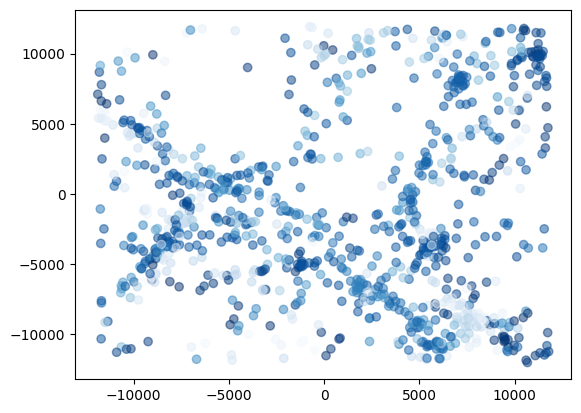

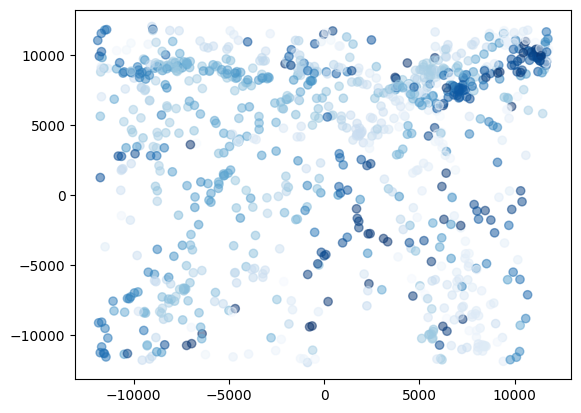

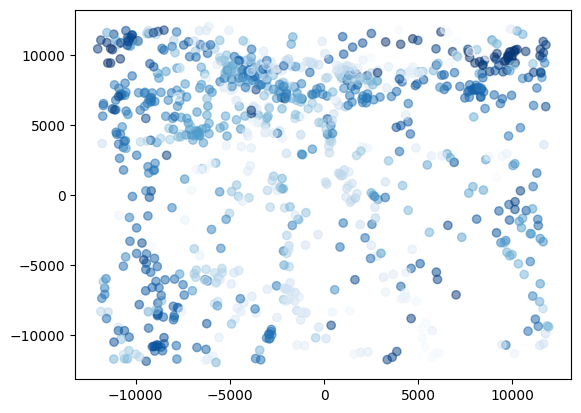

In [70]:
import matplotlib.pyplot as plt

plt.scatter(data=df, x='PosX', y='PosY', c='PosZ', cmap='Blues', alpha=0.5)
plt.show()

plt.scatter(data=df, x='PosX', y='PosZ', c='PosY', cmap='Blues', alpha=0.5)
plt.show()

plt.scatter(data=df, x='PosY', y='PosZ', c='PosX', cmap='Blues', alpha=0.5)
plt.show()

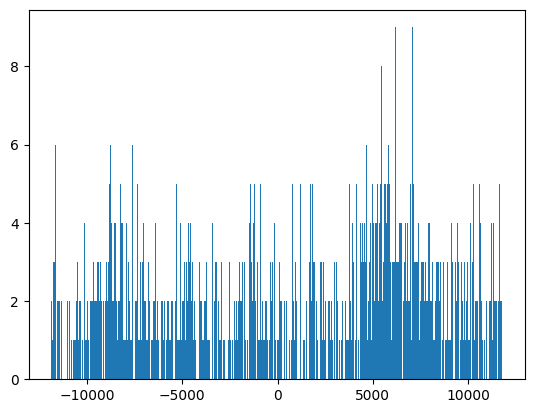

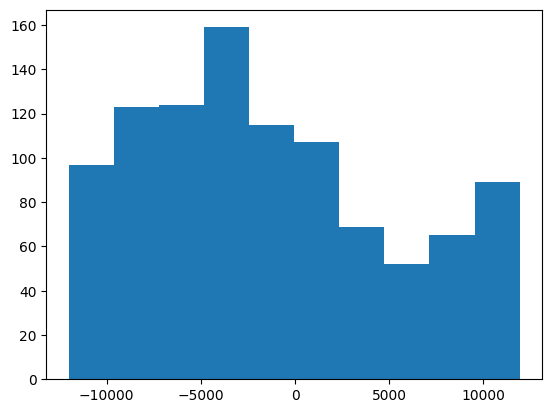

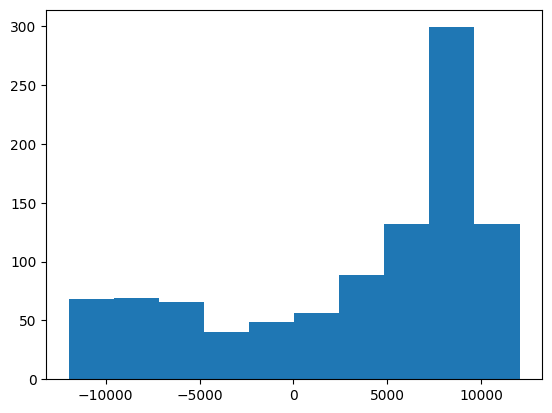